<a href="https://colab.research.google.com/github/SmaherNabil/Heart-disease-prediction/blob/main/HeartDiseaseTeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disease
1. Preprocessing
> a. importing libraries and viewing data

  > b. Visualising





<h> Importing libraries and viewing data </h>

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#reading the csv file into a dataframe
df=pd.read_csv('Heart_Disease.csv')

In [ ]:
#reading the first five rows of the dataframe
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


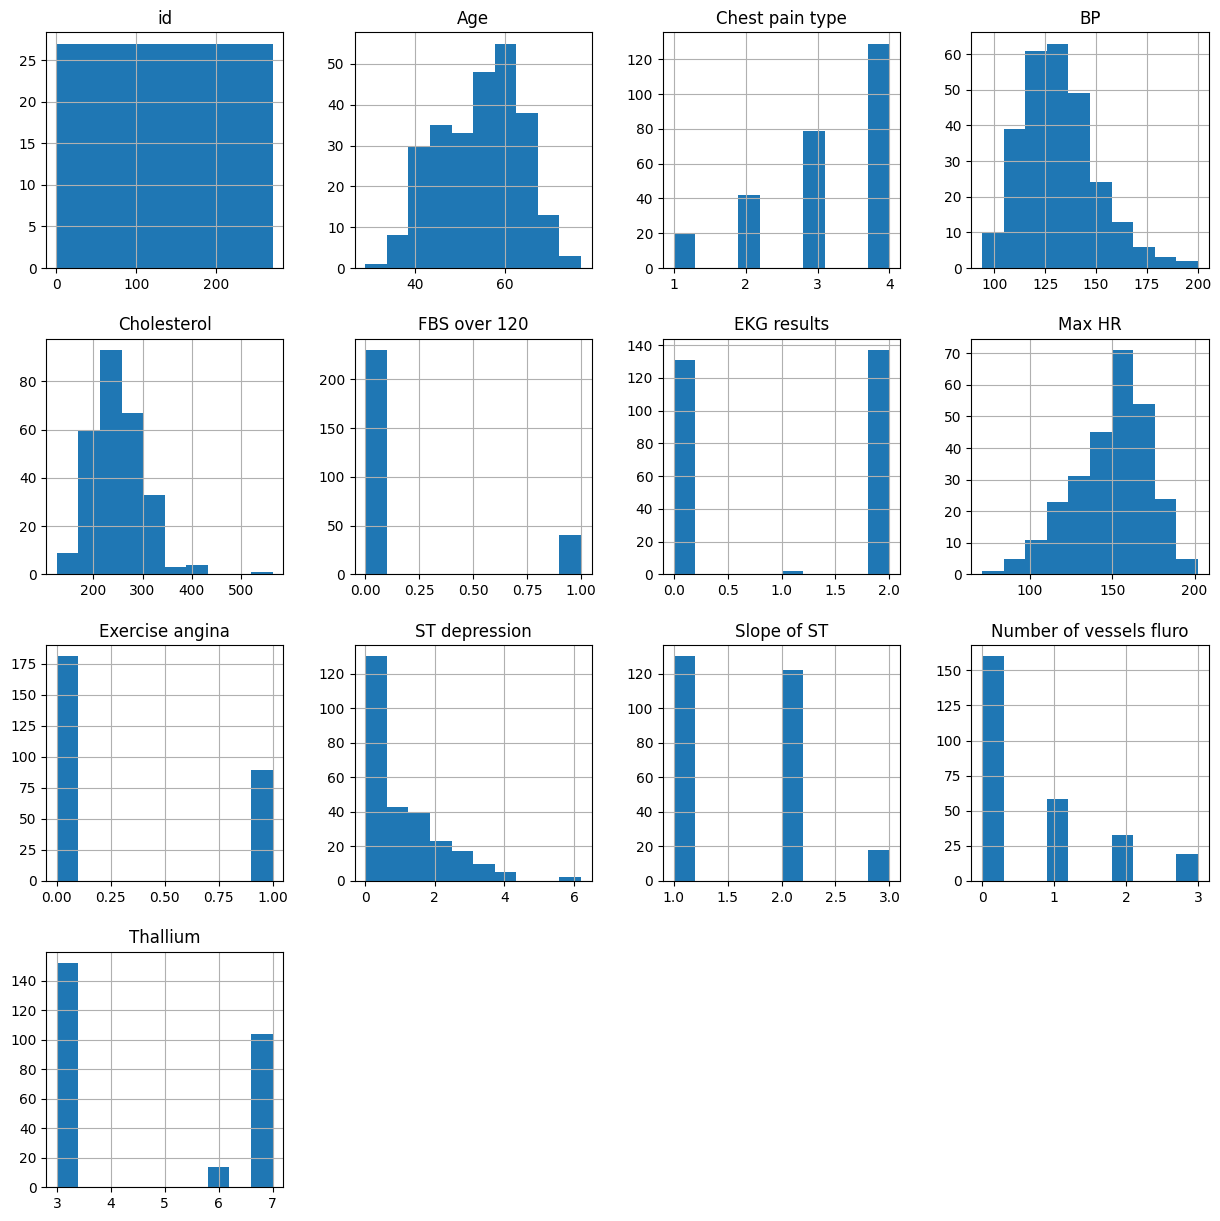

In [ ]:
df.hist(figsize=(15,15));

In [ ]:
df=df.drop(['id'],axis=1)
df
#axis is used to specify if i want to drop rows or columns.
#el column b 1 w el row b 0

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,Female,3,172,199,1,0,162,0,0.5,1,0,7,NaN,smokes,No
266,44.0,Female,2,120,263,0,0,173,0,0.0,1,0,7,Private,never smoked,No
267,56.0,Male,2,140,294,0,2,153,0,1.3,2,0,3,Govt_job,smokes,No
268,57.0,Female,4,140,192,0,0,148,0,0.4,2,0,6,Self-employed,smokes,No


In [ ]:
#to see which column needs to be encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      264 non-null    float64
 1   Gender                   264 non-null    object 
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  work_type                261 non-null    object 
 14  smoking_status           2

In [ ]:
#checking the number of nulls in each column
df.isna().sum()

Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

Visualise data

In [ ]:
df.groupby(['Gender', 'Heart Disease']).count()

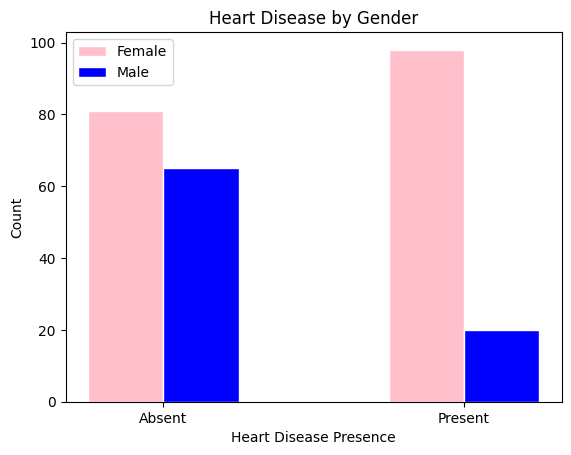

In [ ]:
# Group data by gender and heart disease presence
grouped_data = df.groupby(['Heart Disease', 'Gender']).size().reset_index(name='count')

# Set width of bars and positions on x-axis
barWidth = 0.25
r1 = [1, 2]
r2 = [x + barWidth for x in r1]
#this is for the positions of the bars

# Create two bar plots side by side using different colors for males and females
plt.bar(r1, grouped_data[grouped_data['Gender'] == 'Female']['count'], color='pink', width=barWidth, edgecolor='white', label='Female')
plt.bar(r2, grouped_data[grouped_data['Gender'] == 'Male']['count'], color='blue', width=barWidth, edgecolor='white', label='Male')

# Add xticks on the middle of the group bars and label them accordingly
plt.xlabel('Heart Disease Presence')
plt.xticks([1.125, 2.125], ['Absent', 'Present']) #the sub-labels on the x-axis and their positions.
plt.ylabel('Count')
plt.title('Heart Disease by Gender')
plt.legend()
#to show which bar belongs to which category
# Show plot
plt.show()

In [ ]:
#percentage of males of those that don't have heart disease
print('Percentage of males with no heart disease: ', round((64/(78+64)*100), 2)) #=45%
print('Percentage of males with heart disease: ', round((18/(98+18)*100), 2)) #=15%
print('Percentage of females with no heart disease: ', round((78/(78+64)*100), 2)) #=54%
print('Percentage of females with heart disease: ', round((98/(98+18)*100), 2)) #=84%

Percentage of males with no heart disease:  45.07
Percentage of males with heart disease:  15.52
Percentage of females with no heart disease:  54.93
Percentage of females with heart disease:  84.48


In [ ]:
# In Gender nulls, we have 4 people with no heart disease, so according to our 45% we will fill 2 people male and 2 female.
# We will fill the other 2 Gender nulls that do have heart disease with females since only 15% are males.
df[df['Gender'].isnull()]

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
14,57.0,NaN,4,128,303,0,2,159,0,0.0,1,1,3,Private,never smoked,No
69,47.0,NaN,3,108,243,0,0,152,0,0.0,1,0,3,Self-employed,never smoked,Yes
79,56.0,NaN,2,120,236,0,0,178,0,0.8,1,0,3,Self-employed,Unknown,No
143,51.0,NaN,1,125,213,0,2,125,1,1.4,1,1,3,Self-employed,never smoked,No
148,58.0,NaN,3,132,224,0,2,173,0,3.2,1,2,7,Govt_job,never smoked,Yes
173,68.0,NaN,3,120,211,0,2,115,0,1.5,2,0,3,Self-employed,formerly smoked,No


In [ ]:
df.at[14, 'Gender'] = 'Female'
df.at[79, 'Gender'] = 'Female'
df.at[143, 'Gender'] = 'Male'
df.at[173, 'Gender'] = 'Male'
df.at[148, 'Gender'] = 'Female'
df.at[69, 'Gender'] = 'Female'

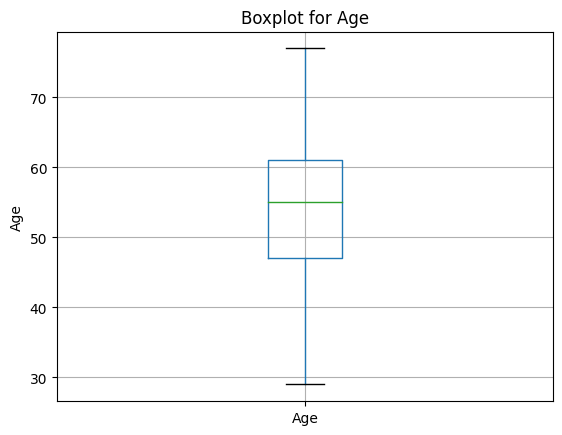

In [ ]:
# create a boxplot for Age column
df.boxplot(column=['Age'])

# set the title and labels
plt.title('Boxplot for Age')
plt.ylabel('Age')

# show the plot
plt.show()

we'll use the median since the data is left skewed, we could've used the mean if the data was symmetric.

In [ ]:
df['Age'].describe()


count    264.000000
mean      54.424242
std        9.183488
min       29.000000
25%       47.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
#finding number of each unique value in the smokig_status column so we know which value to replace the nulls with
smokingcounts=df['smoking_status'].value_counts()
smokingcounts

never smoked       96
formerly smoked    72
Unknown            51
smokes             45
Name: smoking_status, dtype: int64

In [ ]:
#finding number of each unique value in the work_tye column so we know which value to replace the nulls with
workcounts=df['work_type'].value_counts()
workcounts

Private          159
Self-employed     66
Govt_job          32
children           3
Never_worked       1
Name: work_type, dtype: int64

In [ ]:
df[df['work_type'] == 'Never_worked']

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
253,51.0,Female,3,110,175,0,0,123,0,0.6,1,0,3,Never_worked,Unknown,No


In [ ]:
df.at[253, 'work_type'] = 'Self-employed'

In [ ]:
#finding number of each unique value in the work_tye column so we know which value to replace the nulls with
workcounts=df['work_type'].value_counts()
workcounts

Private          159
Self-employed     67
Govt_job          32
children           3
Name: work_type, dtype: int64

In [ ]:
df['work_type']=df['work_type'].fillna('Self-employed')
df['smoking_status']=df['smoking_status'].fillna('Unknown')

In [ ]:
df.isna().sum()

Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
Heart Disease              0
dtype: int64

In [ ]:
# check for duplicate rows
duplicate_rows = df[df.duplicated()]

# remove duplicate rows
df.drop_duplicates(inplace=True)

In the above code, We call the duplicated() function on the dataset to check for duplicate rows. This returns a boolean mask that indicates which rows are duplicates. We store this mask in the duplicate_rows variable. We then call the drop_duplicates() function on the dataset to remove the duplicate rows. We set the inplace parameter to True to modify the original dataset.

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#df=pd.get_dummies(df,columns=['work_type'],drop_first=True)
#df

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#cat_col = df['work_type']
encoder = OneHotEncoder()

one_hot_encoded = encoder.fit_transform(df['work_type'].values.reshape(-1, 1)) #this will return a sparse matrix
#what is a sparse matrix????
#it's a matrix that has mostly zeroes.
#While a sparse matrix contains mostly zero values and is often used
#to represent the one-hot encoded data because it can save memory and computation time.

one_hot_encoded_array = one_hot_encoded.toarray() #returns a dense array
#A dense array is an array that contains mostly non-zero values. In the context of OneHotEncoder,
#a dense array is the opposite of a sparse matrix.
#a dense array contains mostly non-zero values and can be used when memory is not a concern.

mycolumns=encoder.get_feature_names_out([df['work_type'].name])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=mycolumns)
df = pd.concat([df, one_hot_encoded_df], axis=1)
#concating the 2 dfs that i created, the encoded and the original dataframe
df.drop(['work_type','work_type_children'], axis=1, inplace=True)
df


,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,smoking_status,Heart Disease,work_type_Govt_job,work_type_Private,work_type_Self-employed
0,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,formerly smoked,Yes,0.0,1.0,0.0
1,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,never smoked,No,0.0,0.0,1.0
2,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,never smoked,Yes,0.0,1.0,0.0
3,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,smokes,No,0.0,1.0,0.0
4,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,never smoked,No,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,Female,3,172,199,1,0,162,0,0.5,1,0,7,smokes,No,0.0,0.0,1.0
266,44.0,Female,2,120,263,0,0,173,0,0.0,1,0,7,never smoked,No,0.0,1.0,0.0
267,56.0,Male,2,140,294,0,2,153,0,1.3,2,0,3,smokes,No,1.0,0.0,0.0
268,57.0,Female,4,140,192,0,0,148,0,0.4,2,0,6,smokes,No,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder #labelencoder is a class
# Create a LabelEncoder object
le = LabelEncoder()

# Loop through each column and label encode categorical columns
for i in df.columns: #iterate over all columns
    if (df[i].dtype == "O"):
        df[i] = LabelEncoder().fit_transform(df[i])
df

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,smoking_status,Heart Disease,work_type_Govt_job,work_type_Private,work_type_Self-employed
0,70.0,0,4,130,322,0,2,109,0,2.4,2,3,3,1,1,0.0,1.0,0.0
1,67.0,1,3,115,564,0,2,160,0,1.6,2,0,7,2,0,0.0,0.0,1.0
2,57.0,0,2,124,261,0,0,141,0,0.3,1,0,7,2,1,0.0,1.0,0.0
3,64.0,0,4,128,263,0,0,105,1,0.2,2,1,7,3,0,0.0,1.0,0.0
4,74.0,1,2,120,269,0,2,121,1,0.2,1,1,3,2,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,0,3,172,199,1,0,162,0,0.5,1,0,7,3,0,0.0,0.0,1.0
266,44.0,0,2,120,263,0,0,173,0,0.0,1,0,7,2,0,0.0,1.0,0.0
267,56.0,1,2,140,294,0,2,153,0,1.3,2,0,3,3,0,1.0,0.0,0.0
268,57.0,0,4,140,192,0,0,148,0,0.4,2,0,6,3,0,0.0,0.0,1.0


The code loops through each column in the DataFrame and checks if the data type of the column is object (i.e., categorical). If the column is categorical, it is label encoded using the fit_transform() method of LabelEncoder. The encoded column is then replaced in the original DataFrame.

#Normalising

In [ ]:
'''
col_names=df.columns
col_names

from sklearn.preprocessing import MinMaxScaler #this is a module that contains many classes like minmaxscaler, onehotencoder, labelencoder and standardscaler
#difference between minmaxscaler and standardscaler
scaler = MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df))
df.columns=col_names
df
'''

'\ncol_names=df.columns\ncol_names\n\nfrom sklearn.preprocessing import MinMaxScaler #this is a module that contains many classes like minmaxscaler, onehotencoder, labelencoder and standardscaler\n#difference between minmaxscaler and standardscaler\nscaler = MinMaxScaler()\ndf=pd.DataFrame(scaler.fit_transform(df))\ndf.columns=col_names\ndf\n'

RobustScaler is a feature scaling technique used in machine learning to scale features using statistics that are robust to outliers
Robustness of machine learning algorithms refers to their ability to perform well and maintain accuracy even when faced with unexpected or noisy data, such as outliers


In [ ]:
from sklearn.preprocessing import RobustScaler

# Select the features to scale
col_names=df.columns
# Create a RobustScaler object
scaler = RobustScaler()
# Fit and transform the selected features using RobustScaler
df[col_names] = scaler.fit_transform(df[col_names])
df

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,smoking_status,Heart Disease,work_type_Govt_job,work_type_Private,work_type_Self-employed
0,1.153846,0.0,1.0,0.00,1.149254,0.0,0.0,-1.348485,0.0,1.0000,0.0,3.0,0.00,-1.0,1.0,0.0,0.0,0.0
1,0.923077,1.0,0.0,-0.75,4.761194,0.0,0.0,0.196970,0.0,0.5000,0.0,0.0,1.00,0.0,0.0,0.0,-1.0,1.0
2,0.153846,0.0,-1.0,-0.30,0.238806,0.0,-1.0,-0.378788,0.0,-0.3125,-1.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0
3,0.692308,0.0,1.0,-0.10,0.268657,0.0,-1.0,-1.469697,1.0,-0.3750,0.0,1.0,1.00,1.0,0.0,0.0,0.0,0.0
4,1.461538,1.0,-1.0,-0.50,0.358209,0.0,0.0,-0.984848,1.0,-0.3750,-1.0,1.0,0.00,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.230769,0.0,0.0,2.10,-0.686567,1.0,-1.0,0.257576,0.0,-0.1875,-1.0,0.0,1.00,1.0,0.0,0.0,-1.0,1.0
266,-0.846154,0.0,-1.0,-0.50,0.268657,0.0,-1.0,0.590909,0.0,-0.5000,-1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
267,0.076923,1.0,-1.0,0.50,0.731343,0.0,0.0,-0.015152,0.0,0.3125,0.0,0.0,0.00,1.0,0.0,1.0,-1.0,0.0
268,0.153846,0.0,1.0,0.50,-0.791045,0.0,-1.0,-0.166667,0.0,-0.2500,0.0,0.0,0.75,1.0,0.0,0.0,-1.0,1.0


In [ ]:
#checking the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 269
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    float64
 1   Gender                   270 non-null    float64
 2   Chest pain type          270 non-null    float64
 3   BP                       270 non-null    float64
 4   Cholesterol              270 non-null    float64
 5   FBS over 120             270 non-null    float64
 6   EKG results              270 non-null    float64
 7   Max HR                   270 non-null    float64
 8   Exercise angina          270 non-null    float64
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    float64
 11  Number of vessels fluro  270 non-null    float64
 12  Thallium                 270 non-null    float64
 13  smoking_status           270 non-null    float64
 14  Heart Disease            2

#splitting the data into training and testing

In the train_test_split function the default behavior is to split the data randomly. The function shuffles the data before splitting it into training and testing sets, which means that the order of the rows in the original dataframe is not preserved in the resulting training and testing sets. This is done to ensure that the training and testing sets are representative of the overall dataset and to prevent any patterns in the data from affecting the results of the machine learning model

In [ ]:
X=df.drop(columns=['Heart Disease'])
y=df['Heart Disease']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

the random_state parametre it's a random seed, which is a starting point for the random number generator. The random number generator uses the seed to generate a sequence of random numbers that are reproducible. If you use the same seed, you will get the same sequence of random numbers every time you run the function. This is useful for debugging and testing purposes, as it allows you to reproduce the same results every time you run the function. In the train_test_split function, the random_state parameter is used as the seed for the random number generator that is used to generate the splits. By setting the random_state parameter to a fixed value, you can ensure that the splits generated by the function are reproducible. If you don't set the random_state parameter, the function will use a different random seed every time it is called, which can make it difficult to reproduce the same results

this ensures that the same split is generated every time the function is called with the same input data.

#feature selection

quick refresher: what is correlation? Correlation is a statistical measure that describes the degree to which two or more variables are related to each other. It indicates the strength and direction of the relationship between the variables. Correlation does not imply causation, meaning that just because two variables are correlated, it does not necessarily mean that one causes the other.

A correlation coefficient is a numerical measure of the strength and direction of the linear relationship between two variables. It is a statistical concept that helps establish a relationship between predicted and actual values obtained in a statistical experiment.

we want to see the corrrelation between the features to be able to select features to feed the model

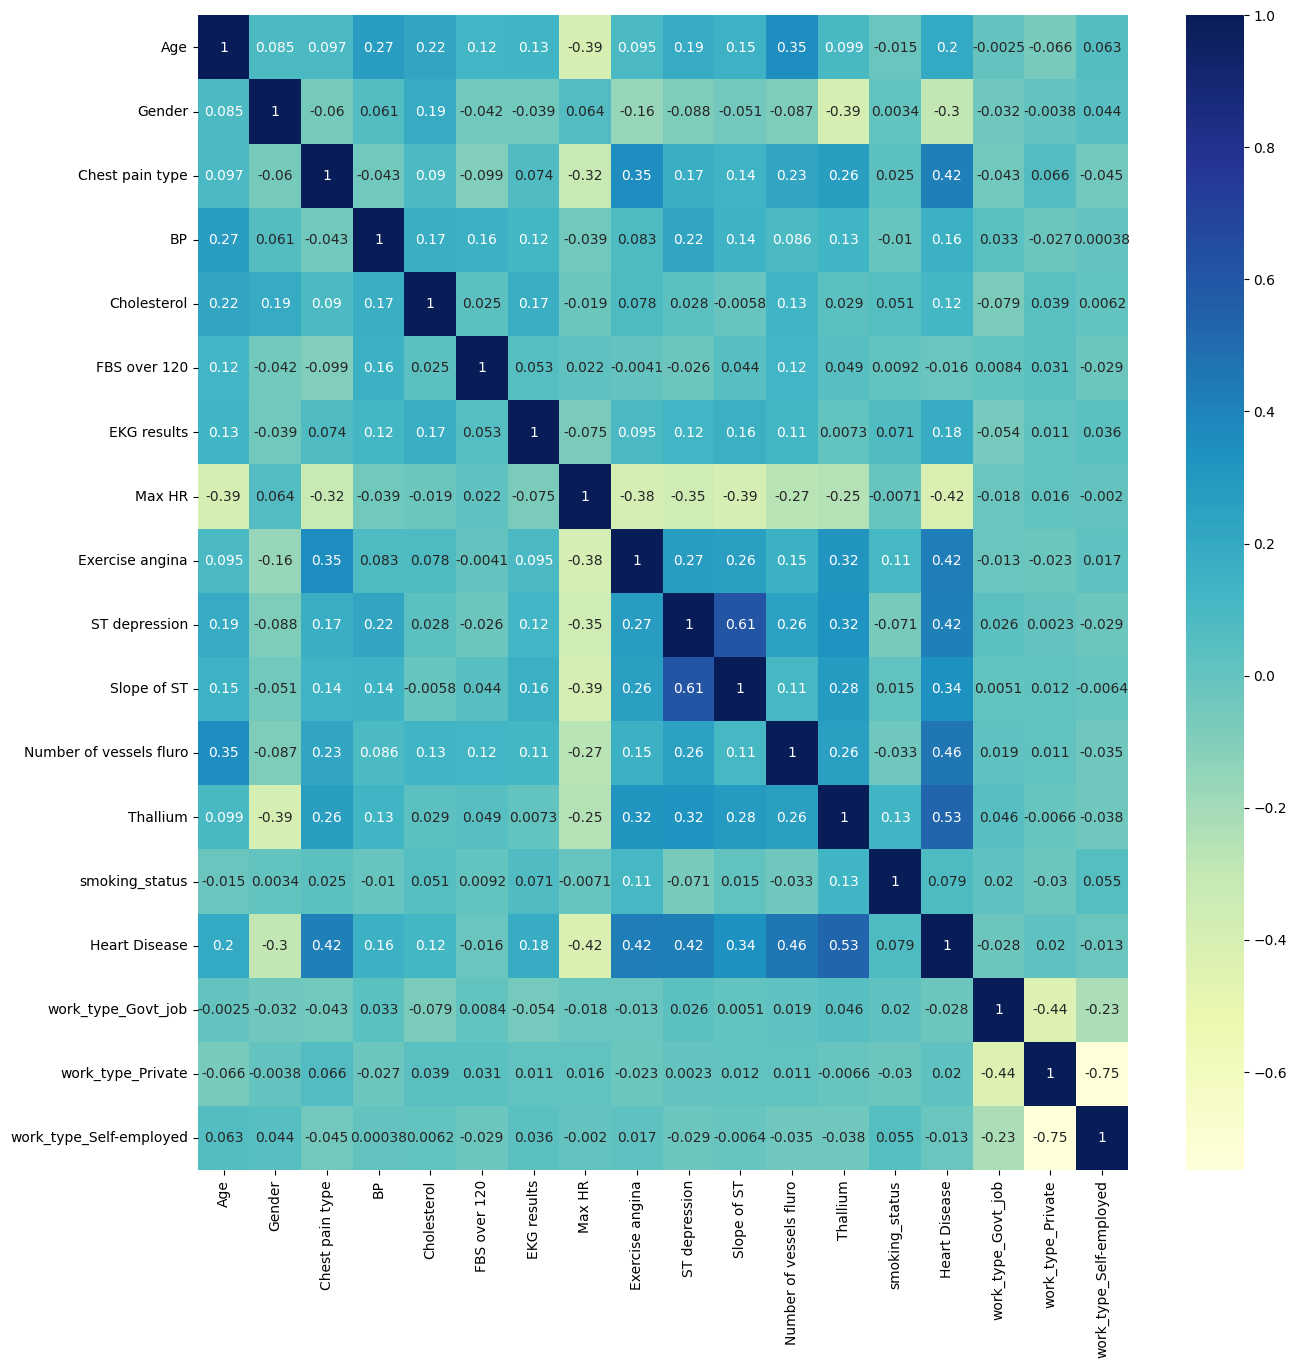

In [ ]:
corr_matrix = df.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
#The annot=True parameter adds numerical annotations to the heatmap cells, indicating the correlation coefficient between the corresponding pair of variables.
plt.show()

It computes the correlation coefficient between each pair of columns in the DataFrame, excluding any null values. The resulting correlation matrix is a square matrix where the diagonal elements are always 1, since they represent the correlation of a variable with itself. The correlation matrix can be used to identify which pairs of variables are positively or negatively correlated, and to what degree. The corr() method can take additional parameters such as the method of correlation to be used (e.g., Pearson, Kendall, Spearman)

by default, corr() method calculates pearson's correlation coefficient if we don't specify any in the parametres list through this equation: r = (sum((xi - mean(x)) * (yi - mean(y))) / (n - 1)) / (std(x) * std(y))

-- xi and yi are the values of x and y for the i-th observation. -- mean(x) and mean(y) are the means of x and y, --std(x) and std(y) are the standard deviations of x and y, and n is the number of observations.

the correlation between the features with the target column is not that clear in the correlation matrix as there are a large number of features, lets visualize it in another way.

<Axes: title={'center': 'Correlation with Target'}>

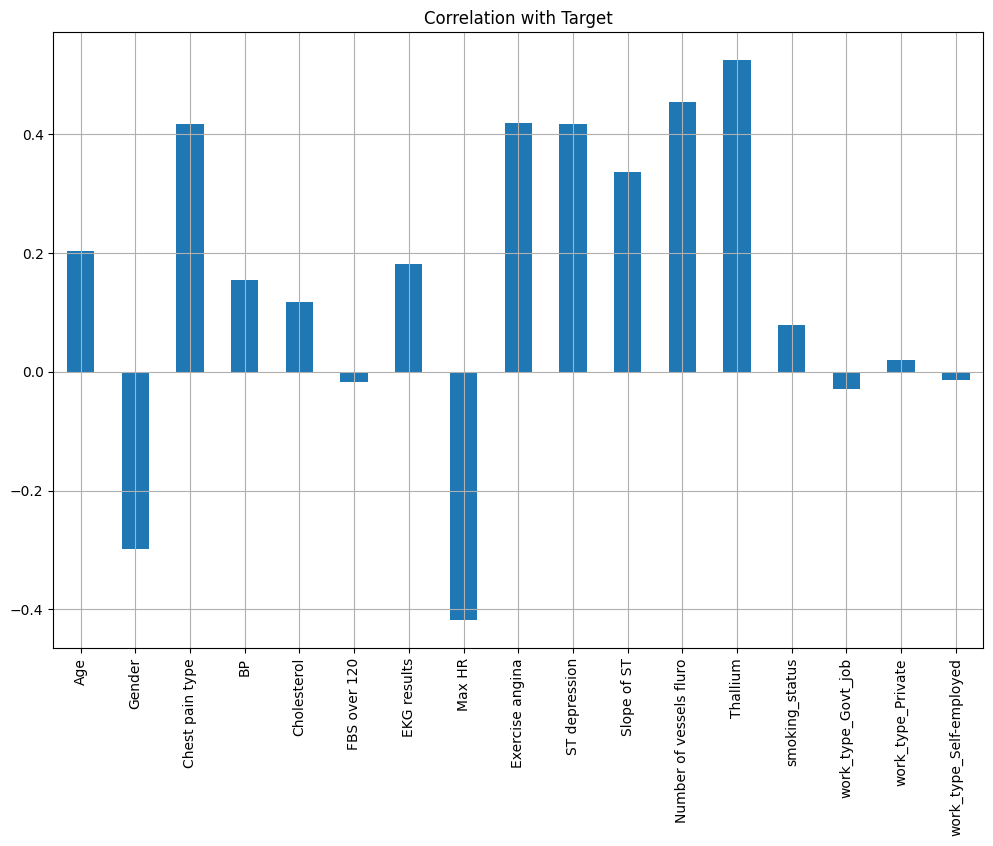

In [ ]:
#without the drop() it calculated the correlation between heart disease and itself. i don't need that.
df.drop('Heart Disease', axis=1).corrwith(df['Heart Disease']).plot(kind = 'bar', grid = True, figsize = (12, 8), title = "Correlation with Target")

corrwith() function computes the pairwise correlation between the columns of a DataFrame and the specific column named 'Heart Disease'. The resulting correlation coefficients are then plotted as a bar chart using the plot()

NOTE: corr() and corrwith() are both methods in Pandas used to compute pairwise correlations between columns of a DataFrame. However, they differ in their inputs and outputs. corr() computes the pairwise correlation between all columns in a DataFrame, excluding any rows or columns with missing values. By default, it uses Pearson's correlation coefficient to compute the correlation between each pair of columns. The resulting correlation matrix is a square DataFrame. corrwith() computes the pairwise correlation between a column of a DataFrame and either another column of the same DataFrame or a Series. It returns a Series containing the correlation coefficients between the specified column and each column or Series in the DataFrame. By default, it uses Pearson's correlation coefficient to compute the correlation.

We can see that 'fbs', 'work_type','smoking_status','bp', 'cholestrol' and 'EKG' are least related with 'target' whereas other features are highly correlated with the 'target' variable.

#Feature Selection

#using L1 Regularisation (AKA Lasso regression)
This method involves training a linear model that uses an L1 penalty. All features are used to train this model and the L1 penalty causes the weight/contribution of unimportant features to be zero. We then extract the non-zeroed features and use them in our machine learning model. This method considers all features and how they collectively contribute to each prediction.

*L1 regularization is a technique used in machine learning to reduce overfitting and perform feature selection. It is also known as Lasso regularization. L1 regularization adds a penalty term to the loss function that is proportional to the absolute value of the weights. This penalty term shrinks the weights towards zero, effectively removing some features altogether. This makes L1 regularization well-suited for feature selection, as it promotes sparse solutions and can be used to identify the most important features in the data.

*In contrast, L2 regularization, also known as Ridge regularization, adds a penalty term to the loss function that is proportional to the square of the weights. This penalty term shrinks the weights towards zero, but does not remove any features altogether. Instead, it reduces the impact of less important features on the model.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

'''
This code snippet demonstrates how to use SelectFromModel from scikit-learn to perform feature selection using a LinearSVC model.
First, a LinearSVC object is created and fitted to the training data using lsvc.fit(X_train, y_train).
Then, a SelectFromModel object is created with the fitted LinearSVC object using sfm = SelectFromModel(lsvc).
The SelectFromModel object is then fitted to the training data and transformed using sfm.fit(X_train, y_train) and x_train_svc=sfm.transform(X_train).
The same transformation is applied to the test data using x_devel_svc= sfm.transform(X_test).
'''

# Create a LinearSVC object
lsvc = LinearSVC(C=0.1, penalty='l1', dual=False)

# Fit the LinearSVC object to the training data
lsvc.fit(X_train, y_train)

# Create a SelectFromModel object with the fitted LinearSVC object
sfm = SelectFromModel(lsvc)

# Fit the SelectFromModel object to the training data to extract the features
sfm.fit(X_train, y_train)

#fit is used to learn the parameters of a model, while transform is used to apply those parameters to new data.

#The transform() method is then applied to both the training and testing data to transform them into a new dataset consisting of only the selected features.
x_train_svc=sfm.transform(X_train) #heya dy elly bab3atha ll SVM

x_devel_svc= sfm.transform(X_test) #dy bardo hattbe3t ll SVM

##############this is just to display the columns that were selected.
# Get the boolean mask of the selected features
selected = sfm.get_support()
# Get the names of the selected features
selected_features = X_train.columns[selected]
#selected
selected_features

Index(['Age', 'Gender', 'Chest pain type', 'Cholesterol', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium', 'smoking_status'],
      dtype='object')

The C parameter controls the amount of regularization, with smaller values of C resulting in stronger regularization. it works like a threshold for the penalty... which features above a certain no. to take...

The penalty parameter is set to 'l1' to specify L1 regularization, and the dual parameter is set to False to use the primal formulation of the linear support vector machine.

*The primal formulation of a mathematical programming problem is *the original model to be solved.

Using the L1 regularization method for feature selection results in 14 of the 16 features being retained! Once we've tried all feature selection methods, we'll try them each in a machine learning model and compare their performance to a model that use all features.

#SelectKBest
This next feature selection method involves evaluating the linear relationship between each feature and the target. The top-k features with the strongest relationship with the target are identified and are used in the machine learning model. We will retain the top 5 features since this was the number of features with a moderate correlation with the target (as identified in the Correlation Plot section of this notebook). Unlike the L1 regularization method, this is a univariate(involving one variable quantity) method, meaning that each feature is considered individually/one-by-one.

In the context of feature selection using the f_classif function in scikit-learn, the F-value is a measure of the statistical significance of the difference between the means of two groups of samples. In particular, it is used to compute the ANOVA F-test statistic, which is a ratio of the variance between groups to the variance within groups.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#By using f_classif as the score function, SelectKBest selects the k-best features based on their F-values
selector = SelectKBest(score_func=f_classif, k=7)
kbest = selector.fit(X_train, y_train)

#we created this small number because there was an runtimerror, since there was a division by zero.
#so we created a small number to divide by it instead of this zero.
EPSILON = 1e-10
x_train_kbest = kbest.transform(X_train) / (np.abs(kbest.transform(X_train)) + EPSILON) #dy hattbe3t ll SVM
x_test_kbest =  kbest.transform(X_test) / (np.abs(kbest.transform(X_test)) + EPSILON) #dy hattbe3t ll SVM

#selectkbest accepts two inputs. awel wa7ed the type of comparison you wanna have, depends on weather you have a continuous features vs. discrete target.
selectedk = selector.get_support()
# Get the names of the selected features
selected_kfeatures = X_train.columns[selectedk]
selected_kfeatures
#el variable da feh el features elly ekhtartaha
#The SelectKBest class scores the features using a function, in this case f_classif, which computes the F-value between each feature and the target variable.
#The k parameter is used to specify the number of top-scoring features to select.


Index(['Chest pain type', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

since there was an error in feature[15]->neverworked, we changed that row since it was only 1 so that we could overcome this error.

The score_func parameter in SelectKBest is a function that takes two arrays as input and returns a pair of arrays (scores, pvalues) or a single array with scores. The scores are used to rank the features, and the top k features are selected. The scoring function can be any callable function that takes two arrays as input and returns a score for each feature.








The f_classif function computes the F-value for each feature and returns an array of scores, which are used to rank the features. The top k features with the highest scores are selected by SelectKBest.

#using random forest
The final feature selection method considered in this notebook is the random forest (an ensemble of decision trees). Random forest feature selection works by deriving the importance of each feature in the dataset. The importance of each feature is calculated based on the decrease in impurity or accuracy when the feature is used in a decision tree. The *feature importance scores *are then used to rank the features in the dataset, and the top-ranked features are selected for the final model.

Implementing this feature selection method involves training a random forest and identifying the features that have an importance weight greater than some threshold.

The threshold parameter is set to 'median', which means that only the features with importance scores above the median score will be selected. The resulting feature set is used to train the Random Forest Classifier model.

The get_support function is used to retrieve the indices of the selected features, which are then printed using the column names of the original dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
#It selects features based on their importance weights, which are calculated by the estimator used.
#The methodology of SelectFromModel involves fitting the estimator on the training dataset to calculate the importance scores for each input feature.
#Then, the transformer selects the features with importance scores above a certain threshold or a fixed number of features specified by the user



# In the case of RandomForestClassifier, feature importance can be measured as the impurity decrease computed from all decision trees in the forest
#create and train a random forest
forest= RandomForestClassifier(n_estimators= 1000, random_state=0)
#n_estimator is the number of decision tree to be used.
forest.fit(X_train, y_train)

#get the most important features
forest_feats= SelectFromModel(forest, threshold= 'median')
#take the chosen features and train them...
forest_feats.fit(X_train, y_train)

#get training and testing sets that have only the most important features
x_train_forest = forest_feats.transform(X_train)
x_test_forest= forest_feats.transform(X_test)
#7tt el transform dy heya elly hab3atha ll svc 3shan tkarn benhom...
#see which features were retained
for i in forest_feats.get_support(indices= True):
    print(X_train.columns[i])
#The get_support function returns a boolean mask that indicates which features are selected,
#and the indices parameter is set to True to retrieve the indices of the selected features.
#The resulting indices are used to retrieve the column names of the selected features from the *original dataset* using the X_train.columns attribute.

Age
Chest pain type
BP
Cholesterol
Max HR
Exercise angina
ST depression
Number of vessels fluro
Thallium


When we use a random forest as our feature selection method, 9 features are retained. Now that we've tried 3 different feature selection approaches, let's see which feature set gives us the best results for a machine learning model. The model we'll use is the Support Vector Machine with its default hyperparameter settings.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score

def eval_svm(X_train, X_test, y_train, y_test):
    """
    INPUT: train_features and test_features are either 2D numpy arrays or pd dataframes with the feature values for the train/test sets
    train_labe1s(what the model is trying to predict), test_labels are either 1D numpy arrays or pd series with the corresponding labels to the train/test features
    ya3ny, ba7seb el precision bta3 kol model 3n tare2 el training data wel data(EL 7A2E2EYA) elly ba7awel a predictaha

The function takes as input the training and testing feature sets, as well as their corresponding labels(TRUE VALUES OF Y),
and returns the precision(ashof kol model 3rft t predict sa7 ad eh) and recall scores for each of them.

The precision and recall scores are computed using the precision_score and recall_score functions from sklearn.metrics, respectively.

    OUTPUT: classification_results is a string of results, including precision, recall, and f1-score for each class
    """
    #scale features before using in SVM
    scaler= StandardScaler()
    X_train= scaler.fit_transform(X_train)
    X_test= scaler.transform(X_test)

    svm= SVC()
    #train el model
    svm.fit(X_train, y_train)

    predicts= svm.predict(X_test)

    #The precision_score function takes as input the TRUE(y_test) labels and PREDICTED(after .predict) labels,
    precision= precision_score(y_test, predicts, average= None, zero_division= 0)
    #The precision_score is a metric used to evaluate the performance of a classification model. It is defined as the ratio of true positives (tp)
    #to the sum of true positives and false positives (fp).
    #In other words, it measures the proportion of positive predictions that are actually correct.

    #The zero_division parameter specifies the value to be returned when there are no positive samples in the predicted labels.
    #If zero_division is set to 0, the precision score is set to 0 when there are no positive samples in the predicted labels.

    recall= recall_score(y_test, predicts, average= None, zero_division= 0)
    #he recall_score is a metric used to evaluate the performance of a classification model.
    #It measures the proportion of true positive cases that were correctly predicted by the model
    #(i.e. the number of correct positive predictions divided by the total number of true positive cases).
    #In other words, it measures how good our machine learning model is at identifying all actual positives out of all positives that exist within a dataset.



    #######Recall measures the model's ability to correctly identify all positive samples out of all !actual! positive samples.
    #Recall is the ratio of true positives (tp) to the sum of true positives and false negatives (fn), where true positives are the number of correctly
    #predicted positive samples and false negatives are the number of incorrectly predicted negative samples.
    #The recall score is a measure of the model's ability to correctly predict positive samples out of all actual positive samples.




    return precision, recall



#The prec_allfeats variable stores the precision score computed by the eval_svm function for the model that uses all features,
#while the rec_allfeats variable stores the recall score computed by the eval_svm function for the same model.

#get performance of model that uses all features
prec_allfeats, rec_allfeats= eval_svm(X_train, X_test, y_train, y_test)

#get performance of model that uses features from L1 regularization
prec_svc, rec_svc= eval_svm(x_train_svc, x_devel_svc, y_train, y_test)

#get performance of model that uses features from SelectKBest
prec_kbest, rec_kbest= eval_svm(x_train_kbest, x_test_kbest, y_train, y_test)

#get performance of model that uses features from random forest
prec_forest, rec_forest= eval_svm(x_train_forest, x_test_forest, y_train, y_test)

print('SVM precision and recall, all features: ', prec_allfeats, rec_allfeats, '\n'+'SVM precision and recall, L1 regularization features: ', prec_svc, rec_svc)
print('SVM precision and recall, top 5 features: ', prec_kbest, rec_kbest, '\n'+'SVM precision and recall, random forest features: ', prec_forest, rec_forest, '\n')
print('Average recalls: ', np.mean(rec_allfeats), np.mean(rec_svc), np.mean(rec_kbest), np.mean(rec_forest))

SVM precision and recall, all features:  [0.86363636 0.72972973] [0.79166667 0.81818182] 
SVM precision and recall, L1 regularization features:  [0.87234043 0.79411765] [0.85416667 0.81818182]
SVM precision and recall, top 5 features:  [0.79166667 0.6969697 ] [0.79166667 0.6969697 ] 
SVM precision and recall, random forest features:  [0.85106383 0.76470588] [0.83333333 0.78787879] 

Average recalls:  0.8049242424242424 0.8361742424242424 0.7443181818181819 0.8106060606060606


Based on the average recall, the model that used "l1 regularization" is the best and should be retained as the final model. If the hospital wanted to reduce the number of features they measure for each patient but still be able to predict the occurrence of a heart failure, they can measure the features that were part of the L1 regularisation feature set.

In [ ]:
from sklearn.model_selection import train_test_split
trainx=df[['Age', 'Gender', 'Chest pain type', 'Cholesterol', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium', 'smoking_status']]
#test=df[['Age', 'Chest pain type', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'Thallium']]
trainy=df['Heart Disease']
final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(trainx, trainy, test_size=0.3, random_state=0)

#train using logistic regression model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1,0.2, 1, 10, 100, 1000], 'penalty': ['l2']}
search = GridSearchCV(model, param_grid, cv=10)
search.fit(final_X_train, final_y_train)
best_params = search.best_params_
'''
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
'''
print(best_params)

{'C': 0.01, 'penalty': 'l2'}


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix ,f1_score
logreg2=LogisticRegression(C=0.01,penalty="l2")
logreg2.fit(final_X_train,final_y_train)
test_pred1 = logreg2.predict(final_X_test) #prediction of X_test
train_pred1 = logreg2.predict(final_X_train) #prediction of X_train

print("Train Confusion Matrix",confusion_matrix(train_pred1,final_y_train))
print("Train F1_Score",f1_score(train_pred1,final_y_train))
print("Test Confusion Matrix",confusion_matrix(test_pred1,final_y_test))
print("Test F1_Score",f1_score(test_pred1,final_y_test))

Train Confusion Matrix [[97 21]
 [ 5 66]]
Train F1_Score 0.8354430379746836
Test Confusion Matrix [[43  7]
 [ 5 26]]
Test F1_Score 0.8125


#train using decision tree model

In [ ]:
# Define hyperparameters to tune
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': [3, 5, 7,6,2,4],
    'criterion':['entropy','gini']
    #'min_samples_split': [2, 5, 10,6,3,4],
    #'min_samples_leaf': [2, 4,3,5,8,6]
}

# Create decision tree model
dt = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)
grid_search.fit(final_X_train, final_y_train)

# Print best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3}
Best score:  0.8413940256045519


In [ ]:
#Decision Trees
#Decision trees have a hierarchical structure, where each leaf of the tree represents a class label while the branches represent represent the process the
#tree used to deduce the class labels.
#criterion='gini',max_depth= 3

dt = DecisionTreeClassifier(criterion='gini',max_depth= 3)
dtt = dt.fit(final_X_train, final_y_train)
predictions_dt_train = dtt.predict(final_X_train)
predictions_dt_test = dtt.predict(final_X_test)

print("Train F1_Score",f1_score(predictions_dt_train,final_y_train))
print("Test F1_Score",f1_score(predictions_dt_test,final_y_test))


Train F1_Score 0.8536585365853658
Test F1_Score 0.7222222222222221


#SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
mysvm = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf','poly','linear']}
grid = GridSearchCV(mysvm, param_grid, refit = True, verbose = 3) #verbose is the details i want to be printed
#The refit parameter is set to True, which means that the GridSearchCV method will refit the best estimator on the entire dataset.

# fitting the model for grid search
grid.fit(final_X_train, final_y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.553 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.553 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.711 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.684 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.763 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.842 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.730 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.763 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=0.01, C=1)
classifier.fit(final_X_train,final_y_train)

SVC(C=1, gamma=0.01)

In [ ]:
X_train_pred = classifier.predict(final_X_train)
accuracy=accuracy_score(X_train_pred,final_y_train)
accuracy

0.8677248677248677

In [ ]:
X_test_pred = classifier.predict(final_X_test)
accuracy=accuracy_score(X_test_pred,final_y_test)
accuracy

0.8641975308641975

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(final_X_train,final_y_train)
 pred_i = knn.predict(final_X_test)
 error_rate.append(np.mean(pred_i != final_y_test))
 #print(pred_i != final_y_test)
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Minimum error: 0.16049382716049382 at K = 6


In [ ]:
clf=KNeighborsClassifier(n_neighbors=6) #where you will declare your classifier
clf.fit(final_X_train,final_y_train)
pred=clf.predict(final_X_test) #prediction of X_test
pred_train= clf.predict(final_X_train) #prediction of X_train

In [ ]:
'''the evaluation matrices you will use,
 you have to aim for better test f1_score'''
from sklearn.metrics import confusion_matrix ,f1_score
print("Train Confusion Matrix",confusion_matrix(pred_train,final_y_train))
print("Train F1_Score",f1_score(pred_train,final_y_train))
print(confusion_matrix(pred,final_y_test))
print("Test F1_Score",f1_score(pred,final_y_test))

Train Confusion Matrix [[96 23]
 [ 6 64]]
Train F1_Score 0.8152866242038218
[[42  8]
 [ 6 25]]
Test F1_Score 0.7812499999999999


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB() #where you well declare your classifier
clf.fit(final_X_train,final_y_train)
pred=clf.predict(final_X_test) #prediction of X_test
pred_train= clf.predict(final_X_train) #prediction of X_train

In [ ]:
'''the evaluation matrices you will use,
 you have to aim for better test f1_score'''
from sklearn.metrics import confusion_matrix ,f1_score
print("Train Confusion Matrix",confusion_matrix(pred_train,final_y_train))
print("Train F1_Score",f1_score(pred_train,final_y_train))

print(confusion_matrix(pred,final_y_test))
print("Test F1_Score",f1_score(pred,final_y_test))

Train Confusion Matrix [[91 12]
 [11 75]]
Train F1_Score 0.8670520231213873
[[38  6]
 [10 27]]
Test F1_Score 0.7714285714285715
